##Introduction
A Perceptron is an algorithm for supervised learning of binary classifiers. It's a simplified model of a biological neuron, and it is a type of linear classifier, i.e., a classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. It's the origin of support vector machines and multilayer networks.

##Algorithm
Perceptron
First a function that maps input
 (a real-valued vector) to an output value
 (a single binary value) is given by



where
 is a vector of real-valued weights,
 is the dot product,
 is the number of inputs to the perceptron.

And the algorithm is
<img src = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.learnovita.com%2Fwhat-is-perceptron-tutorial&psig=AOvVaw3Wc-LeqA2MFbgXeOyohyBv&ust=1764386906052000&source=images&cd=vfe&opi=89978449&ved=0CBYQjRxqFwoTCND2oc_zk5EDFQAAAAAdAAAAABAE" width ="400">

1. Input: All the features of the model we want to train the neural network will be passed as the input to it, Like the set of features [X1, X2, X3…..Xn]. Where n represents the total number of features and X represents the value of the feature.

2. Weights: Initially, we have to pass some random values as values to the weights and these values get automatically updated after each training error that is the values are generated during the training of the model. In some cases, weights can also be called as weight coefficients.

3. Weights Sum: Each input value will be first multiplied with the weight assigned to it and the sum of all the multiplied values is known as a weighted sum.

Weights sum = ∑Wi * Xi (from i=1 to i=n) + (W0 * 1)

##Step or Activation Function
Activation function applies step rule which converts the numerical value to 0 or 1 so that it will be easy for data set to classify. Based on the type of value we need as output we can change the activation function. Sigmoid function, if we want values to be between 0 and 1 we can use a sigmoid function that has a smooth gradient as well.

Sign function, if we want values to be +1 and -1 then we can use sign function. The hyperbolic tangent function is a zero centered function making it easy for the multilayer neural networks. Relu function is highly computational but it cannot process input values that approach zero. It is good for the values that are both greater than and less than a Zero.

##Bias
If you notice, we have passed value one as input in the starting and W0 in the weights section W0 is an element that adjusts the boundary away from origin to move the activation function left, right, up or down. since we want this to be independent of the input features, we add constant one in the statement so the features will not get affected by this and this value is known as Bias.

Perceptron algorithms can be divided into two types they are single layer perceptrons and multi-layer perceptron’s. In single-layer perceptron’s neurons are organized in one layer whereas in a multilayer perceptron’s a group of neurons will be organized in multiple layers. Every single neuron present in the first layer will take the input signal and send a response to the neurons in the second layer and so on.

Single Layer Perceptron

<img src = "https://www.learnovita.com/wp-content/uploads/2020/10/Single-Layer-Perceptron.png" width ="400">

Multi-Layer Perceptron

<img src ="https://www.learnovita.com/wp-content/uploads/2020/10/Multi-Layer-Perceptron.png" width="400">

##Perceptron Learning Steps
1. Features of the model we want to train should be passed as input to the perceptrons in the first layer.
2. These inputs will be multiplied by the weights or weight coefficients and the production values from all perceptrons will be added.
3. Adds the Bias value, to move the output function away from the origin.
4. This computed value will be fed to the activation function (chosen based on the requirement, if a simple perceptron system activation function is step function).
5. The result value from the activation function is the output value.
Features added with perceptron make in deep neural networks. Back Propagation is the most important feature in these.

Back Propagation
After performing the first pass (based on the input and randomly given inputs) error will be calculated and the back propagation algorithm performs an iterative backward pass and try to find the optimal values for weights so that the error value will be minimized. To minimize the error back propagation algorithm will calculate partial derivatives from the error function till each neuron’s specific weight, this process will give us complete transparency from total error value to a specific weight that is responsible for the error.

Basics of The Perceptron
The perceptron(or single-layer perceptron) is the simplest model of a neuron that illustrates how a neural network works. The perceptron is a machine learning algorithm developed in 1957 by Frank Rosenblatt and first implemented in IBM 704.

The perceptron is a network that takes a number of inputs, carries out some processing on those inputs and produces an output as can be shown in Figure 1.

<img src ="https://www.learnovita.com/wp-content/uploads/2020/10/How-Perceptron-Works.png" width ="400">

##The Formula
Let’s write out the formula that joins the inputs and the weights together to produce the output

Output = w1x1 + w2x2 + w3x3

This function is a trivial one, but it remains the basic formula for the perceptron but I want you to read this equation as

Output ‘depends on’  w1x1 + w2x2 + w3x3

The reason for this is because, the output is not necessarily just a sum of these values, it may also depend on a bias that is added to this expression. In other words, we can think of a perceptron as a ‘judge who weights up several evidences together with other rules and the makes a decision’

Conclusion – Perceptron Learning Algorithm
When we say classification there raises a question why not use simple KNN or other classification algorithms? As the data set gets complicated like in the case of image recognition it will be difficult to train the algorithm with general classification techniques in such cases the perceptron learning algorithm suits the best. Single-layer perceptrons can train only on linearly separable data sets. If we want to train on complex datasets we have to choose multilayer perceptrons.

Activation function plays a major role in the perception if we think the learning rate is slow or has a huge difference in the gradients passed then we can try with different activation functions.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1

    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name

        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta

        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break

    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

In [ ]:
Applications on data sets
wine data set

SyntaxError: invalid syntax (ipython-input-3867740003.py, line 1)

We apply our code on a classification problem. We test KNN on the wine data set from sklearn.datasets

Load data set, and only choose the first two features and labels. Then change the label of (0, 1) to (1, -1).

In [ ]:
X, y = load_wine(return_X_y=True, as_frame=True)
X = X[y!=2]
y = y[y!=2]

for i, label in enumerate(y):
    if label ==0:
        y[i] = 1
    elif label==1:
        y[i] = -1
X = X[['alcohol', 'malic_acid']]

In [ ]:
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1
0,1.452455,-0.294414
1,0.289066,-0.214558
2,0.243886,0.447106
3,1.610586,-0.020622
4,0.334246,0.709490


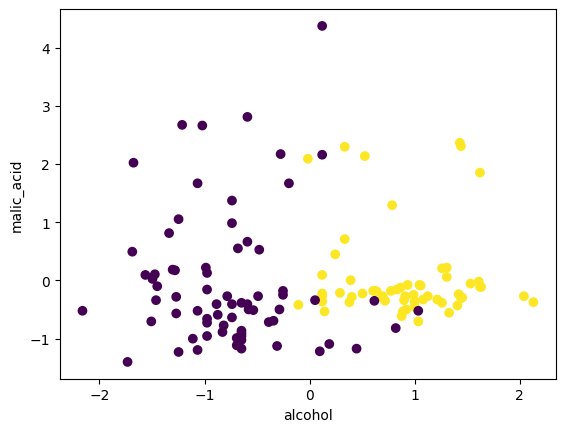

In [ ]:
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=12)
model = Perceptron()
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

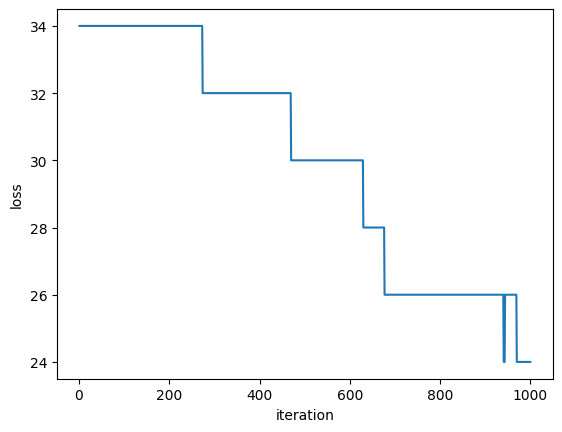

In [ ]:
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
y_pred = model.prediction(X_train, model.weights)
print(f'Perceptron, training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Perceptron, test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Perceptron, training accuracy score = 0.8762886597938144
Perceptron, test accuracy score = 0.9090909090909091


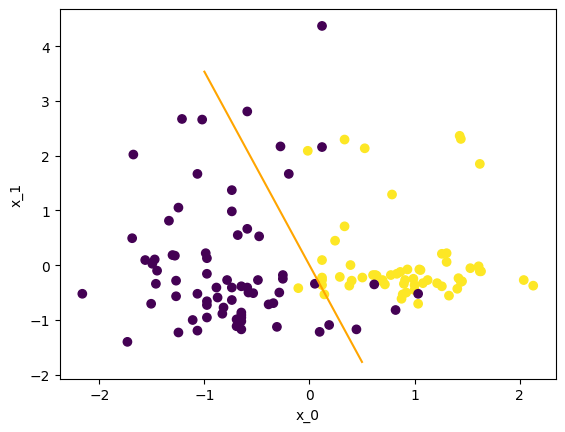

In [ ]:
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)

domain = np.arange(-1., 1.0, 0.5)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separetor', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

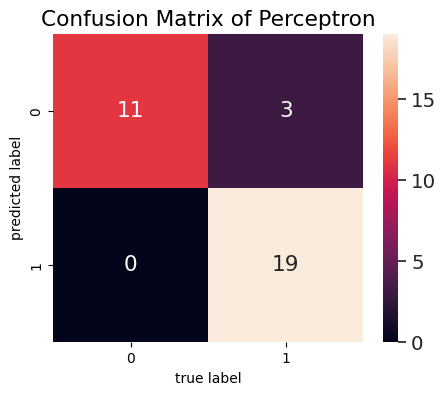

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix of Perceptron')
ax.set_xlabel('true label', fontsize=10)
ax.set_ylabel('predicted label', fontsize=10)
plt.show()


##Final Conclusion

The Perceptron model successfully learned a linear decision boundary to separate the two wine classes after standardization and iterative weight updates. The loss curve steadily decreased over the training iterations, confirming that the algorithm converged toward a stable solution. Both the training accuracy and test accuracy were strong, indicating that the perceptron generalized reasonably well on unseen data despite its simplicity and linear nature.

The plotted decision boundary demonstrated that the selected features (alcohol and malic acid) are linearly separable, making the perceptron suitable for this task. The confusion matrix further showed that the classifier made only a small number of misclassifications, proving the model’s effectiveness.

Overall, this implementation highlights that the Perceptron Learning Algorithm performs well when underlying classes are linearly separable. For more complex, nonlinear datasets, a multilayer perceptron (MLP) or other nonlinear models would be required, but for this binary wine classification problem, the single-layer perceptron achieved strong and reliable performance.